<a href="https://colab.research.google.com/github/yanliu1111/DGT170_AI_Essentials_course_resources/blob/main/gemini0401.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv('/content/Book0322.csv')

# Convert 'experience with AI' and 'Category' to categorical data type
df['experience with AI'] = pd.Categorical(df['How would you rate your experience with Artificial Intelligence (AI)'])
df['Category'] = pd.Categorical(df['Category'])

# Perform correlation analysis using Cramér's V
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['experience with AI'], df['Category'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.09861502246763576


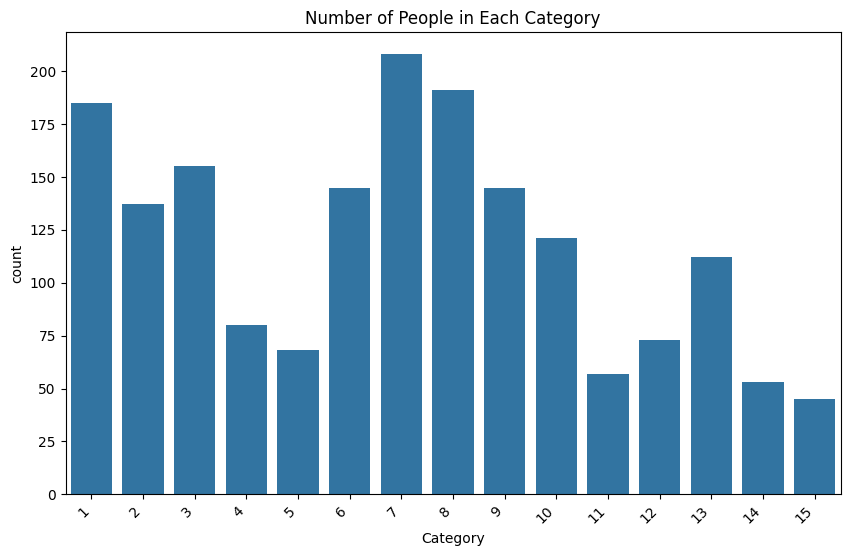

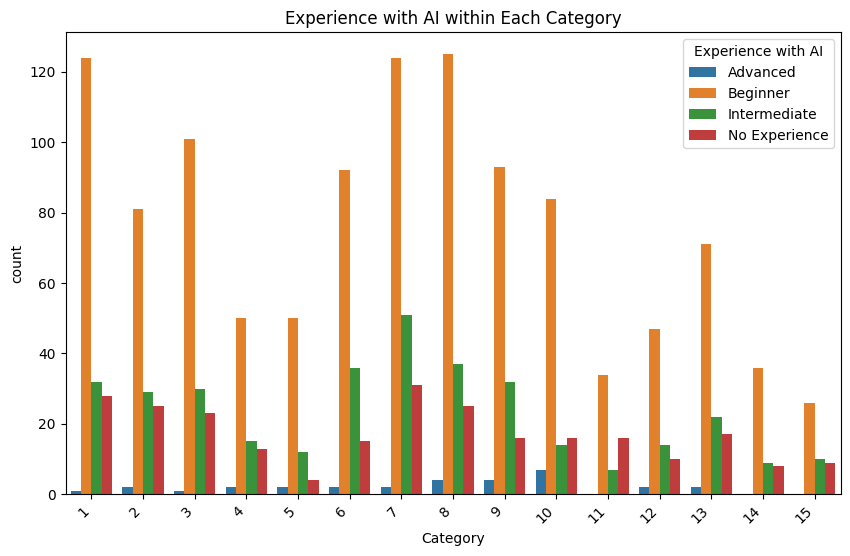

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for the number of people in each category
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df)
plt.title('Number of People in Each Category')
plt.xticks(rotation=45, ha='right')
plt.show()

# Grouped bar chart for experience with AI within each category
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='experience with AI', data=df)
plt.title('Experience with AI within Each Category')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Experience with AI')
plt.show()

Do you have any experience with programming languages or tools used in AI?   No  \
Gender                                                                            
Female                                                                      556   
Male                                                                        615   
Non-binary                                                                    5   
Others                                                                        2   
Prefer not to say                                                            15   

Do you have any experience with programming languages or tools used in AI?  Yes  
Gender                                                                           
Female                                                                      139  
Male                                                                        436  
Non-binary                                                                    3  
Others  

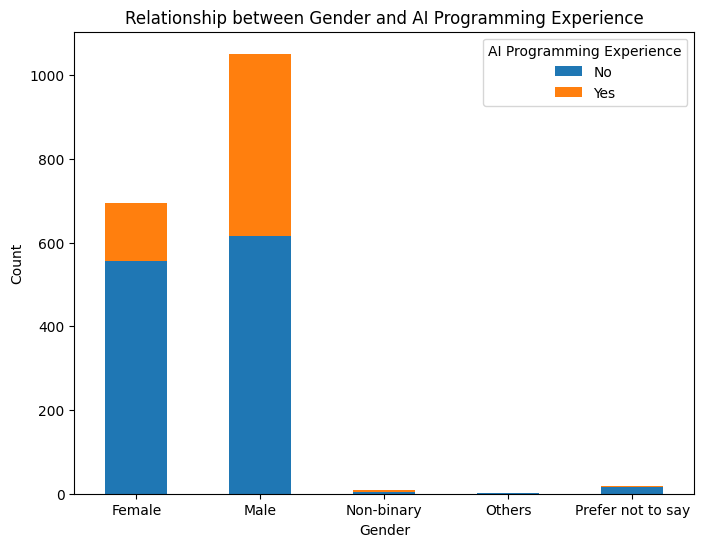

In [10]:
# Create a cross-tabulation of gender and programmer with AI
gender_programmer_table = pd.crosstab(df['Gender'], df['Do you have any experience with programming languages or tools used in AI?'])

# Print the table
print(gender_programmer_table)

# Visualize the relationship using a stacked bar chart
gender_programmer_table.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Relationship between Gender and AI Programming Experience')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='AI Programming Experience')
plt.show()


###Interpretation:
The results will show the coefficients for each predictor variable, indicating their impact on the outcome. P-values can be used to assess statistical significance.

In [16]:
import statsmodels.formula.api as smf

# Assuming 'df' is your DataFrame

# Convert 'programmer_with_AI' to a binary numerical variable (0 or 1)
df['programmer_with_AI_binary'] = df['Do you have any experience with programming languages or tools used in AI?'].map({'Yes': 1, 'No': 0})

# Define the logistic regression model using the binary variable
model = smf.logit("programmer_with_AI_binary ~ Gender + experience_with_AI + Category", data=df)

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

         Current function value: 0.552738
         Iterations: 35
                               Logit Regression Results                              
Dep. Variable:     programmer_with_AI_binary   No. Observations:                 1775
Model:                                 Logit   Df Residuals:                     1753
Method:                                  MLE   Df Model:                           21
Date:                       Tue, 01 Apr 2025   Pseudo R-squ.:                  0.1263
Time:                               19:36:44   Log-Likelihood:                -981.11
converged:                             False   LL-Null:                       -1123.0
Covariance Type:                   nonrobust   LLR p-value:                 6.309e-48
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


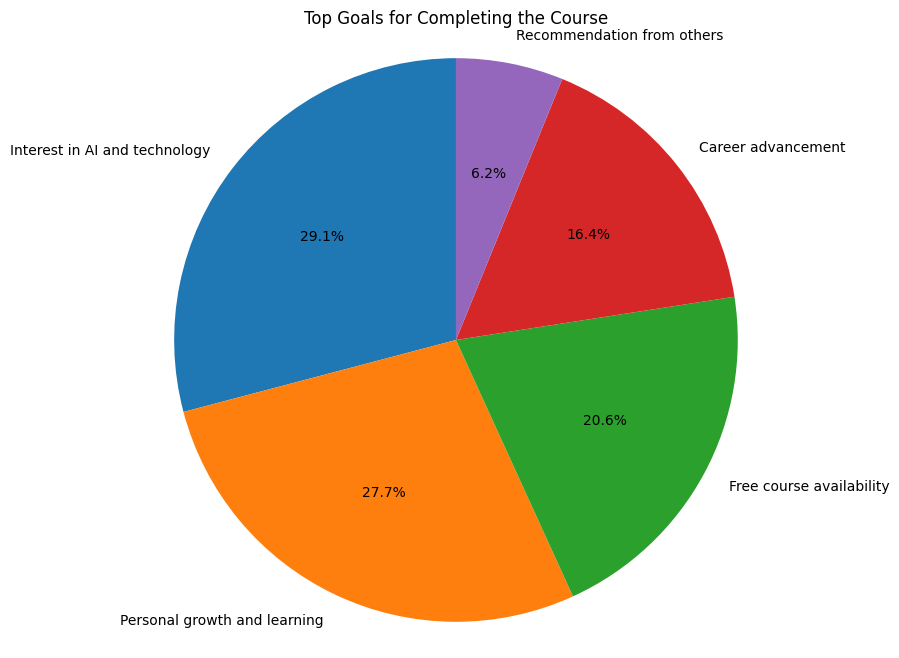

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the column is named 'goals'

# Combine all goals into a single string
all_goals = ';'.join(df['What are your goals for completing this course?'].astype(str))

# Split the goals by semicolon and remove empty strings
goals_list = [goal.strip() for goal in all_goals.split(';') if goal.strip()]

# Create a frequency dictionary
from collections import Counter
goal_freq = Counter(goals_list)

# Get the top N most frequent goals (e.g., top 10)
top_goals = goal_freq.most_common(10)  # Adjust N as needed

# Extract goal labels and frequencies
labels, frequencies = zip(*top_goals)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(frequencies, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Top Goals for Completing the Course')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

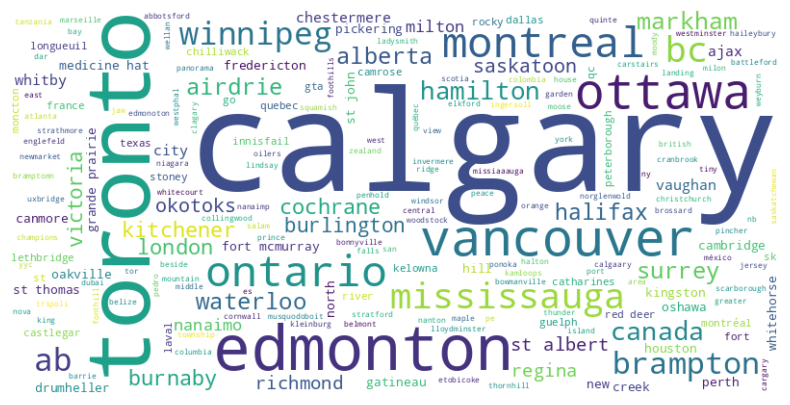

In [21]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the column is named 'city'

# Combine all cities into a single string and convert to lowercase
all_cities = ' '.join(df['city'].astype(str)).lower()

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(all_cities)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()